In [ ]:
import pandas as pd
df = pd.read_csv('Тестовое задание - tz_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         227 non-null    object 
 6   x             228 non-null    float64
 7   y             228 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


In [ ]:
df.head()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296


Удаляем лишний столбец (good (1))

In [ ]:
df = df.drop(columns='good (1)')


Определяем число дубликатов в каждой области (area) суммарно по всем областям

In [ ]:
df.duplicated(subset=['area', 'keyword']).sum()

7

Удаляем дубликаты

In [ ]:
df.drop_duplicates(subset=['area', 'keyword'], inplace=True)


Проверяем, что дубликатов внутри каждой области (area) не осталось

In [ ]:
df.duplicated(subset=['area', 'keyword']).sum()

0

In [ ]:
#def drop_duplicated(df, list):
#    df[list[i]].drop_duplicates(inplace=True)
      

Проверяем наличие пустых (null) значений

In [ ]:
df.isnull().sum()

area            1
cluster         1
cluster_name    1
keyword         1
count           2
x               1
y               1
dtype: int64

Удаляем пустые (null) значения по колонке показателя (count)

In [ ]:
df.dropna(subset=['count'], inplace=True)

Снова проверяем наличие пустых (null) значений

In [ ]:
df.isnull().sum()

area            0
cluster         0
cluster_name    0
keyword         0
count           0
x               0
y               0
dtype: int64

Колонку (y) необходимо привести к типу float для построения визуализации.
Напишем функцию, которая проверит каждое значение колонки на возможность приведения к типу float и вернет списое индексов, для которых приведение не удалось.

In [ ]:
def y_drop(df):
    drop_list = []
    for y in df['y']:
        try:
            float(y)
        except ValueError:
            drop_list.append(df[df['y'] == y].index[0])
    return drop_list

Удаляем строки, для которых приведение типов провести не удалось, и приводим оставшиеся строки к типу float 

In [ ]:
df.drop(index=y_drop(df), inplace=True)
df['y'] = df['y'].astype(float)

Проверяем, что приведение типов удалось выполнить

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 228
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          219 non-null    object 
 1   cluster       219 non-null    float64
 2   cluster_name  219 non-null    object 
 3   keyword       219 non-null    object 
 4   count         219 non-null    object 
 5   x             219 non-null    float64
 6   y             219 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.7+ KB


Напишем функцию, которая посчитает число уникальных кластеров внутри каждой области и вернет список этих чисел. Так мы узнаем, какое количество цветов нужно для описания каждого кластера внутри каждой области.

In [ ]:
def color_count(df):
    area_list = df['area'].unique()
    len_list = []
    for i in range(len(area_list)):
        len_list.append(len(df[df['area'] == area_list[0]]['cluster'].unique()))
    return len_list

Найдем максимальное число кластеров в области

In [ ]:
max(color_count(df))

4

Создадим список цветов для кластеров

In [ ]:
color_list = ['blue', 'red', 'green', '#e377c2']

Напишем функцию, которая вернет исходную таблицу  со столбцом цветов (color) 

In [ ]:
def add_color(df, color_list):
    area_list = df['area'].unique()
    for i in range(len(area_list)):
        cluster_list = df[df['area'] == area_list[i]]['cluster'].unique()
        for j in range(len(cluster_list)):
            df_new = df[(df['area'] == area_list[i]) & (df['cluster'] == cluster_list[j])] 
            df_new['color'] = color_list[j]
            df_last = pd.concat([df_last, df_new]) if (i + j) > 0 else df_new
    return df_last

Добавим столбец цветов (color) и переставим столбцы в нужном порядке

In [ ]:
df_fin = add_color(df, color_list)
df_fin = df_fin[['area', 'cluster', 'cluster_name', 'keyword', 'x', 'y', 'count', 'color']]
df_fin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796,1260,blue
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.850729,866,blue
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.898137,163,blue
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281428,1146,blue
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.396741,823,red
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810,279,green
225,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642820,335,green
226,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699,1782,#e377c2
227,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151199,84,#e377c2


Отсортируем строки по столбцам

In [ ]:
df_fin.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending=[True, True, True, False], inplace=True, ignore_index=True)
df_fin.tail(30)

,area,cluster,cluster_name,keyword,x,y,count,color
189,twisted,3.0,Кластер 3,operating stevens regularly,0.861921,3.642691,1665,#e377c2
190,winner,0.0,Кластер 0,filter collect,12.423865,11.579780,19,blue
191,winner,0.0,Кластер 0,toolbar portfolio,8.644374,5.716254,161,blue
192,winner,0.0,Кластер 0,suggestion testimonials,8.959875,3.861840,1421,blue
193,winner,0.0,Кластер 0,collectables departments,9.123592,1.939351,1041,blue
194,winner,1.0,Кластер 1,celtic automation patients sectors,8.964840,9.143086,1803,red
195,winner,1.0,Кластер 1,mirrors administration,1.724397,12.864915,1727,red
196,winner,1.0,Кластер 1,turtle electronic,13.427780,4.023582,1393,red
197,winner,1.0,Кластер 1,retirement privilege pathology sydney,8.198546,6.322510,1384,red
198,winner,2.0,Кластер 2,courtesy textiles diameter,10.152719,13.851832,428,green


Сохраним полученную таблицу

In [ ]:
df_fin.to_csv('tz_data_complete.csv')
df_fin

,area,cluster,cluster_name,keyword,x,y,count,color
0,ar\vr,0.0,Кластер 0,reservations linking,10.195602,12.259496,751,blue
1,ar\vr,0.0,Кластер 0,interfaces neutral,10.443533,13.809915,586,blue
2,ar\vr,0.0,Кластер 0,committees parallel,6.735260,3.613983,173,blue
3,ar\vr,0.0,Кластер 0,written conflict fabulous,2.991167,7.106799,1443,blue
4,ar\vr,1.0,Кластер 1,filling volunteers academics,10.833920,8.652737,773,red
...,...,...,...,...,...,...,...,...
214,worlds,2.0,Кластер 2,recipient traffic,5.593629,0.553368,236,green
215,worlds,2.0,Кластер 2,operating stevens,11.535669,4.165849,1382,green
216,worlds,3.0,Кластер 3,immunology plates,2.407028,7.651527,1653,#e377c2
217,worlds,3.0,Кластер 3,holdings herbal,3.986508,10.906340,1476,#e377c2


# Часть 2

In [ ]:
import matplotlib.pyplot as plt

Напишем функцию, которая выполняет перенос строки для длинных слов (n>15).

In [ ]:
def str_break(word):
    if len(word) > 15:
        word_list = word.split(maxsplit=1)
        return word_list[0] + '\n' + word_list[1] if len(word_list) == 2 else word
    return word

Напишем функцию, которая строит визуализации для каждой области.

In [ ]:
def area_scatters():
    global plt
    area_list = df_fin['area'].unique()
    i_init = 0
    PIX_IN = 96.358115 #число пикселей на дюйм
    fig_size = 1500/PIX_IN #размер графика в пикселях
    for area in area_list:
        n = 0
        df_cyc = df_fin[df_fin['area'] == area]
        fig = plt.figure(figsize=(fig_size, fig_size))
        ax = fig.add_subplot()
        for i in range(i_init, i_init + len(df_cyc)):
            keyword = str_break(df_cyc['keyword'][i])
            ax.scatter(x=df_cyc['x'][i], y=df_cyc['y'][i], c=df_cyc['color'][i], alpha=0.3, s=200, label=df_cyc['cluster_name'][i])
            ax.annotate(s=keyword, xy=(df_cyc['x'][i], df_cyc['y'][i]), fontsize='x-large', ha='center', va='center')
        i_init = i_init + len(df_cyc)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), title="Кластеры", fontsize='large', title_fontsize='large')
        xlim = ax.get_xlim()[1]
        ylim = ax.get_ylim()[0]
        ax.text(x=xlim, y=ylim, s='Источник: система интеллектуального анализа больших данных iFORA', fontsize='xx-large', ha='right')
        plt.savefig(f'area_{n}')
        n += 1


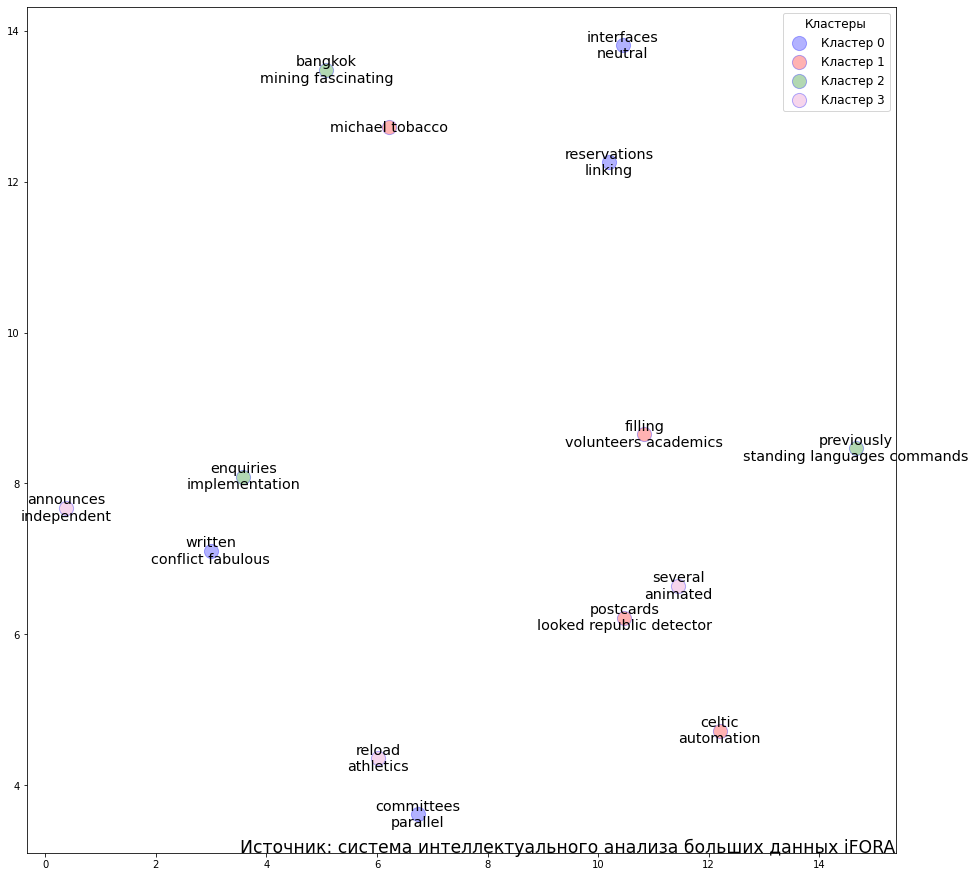

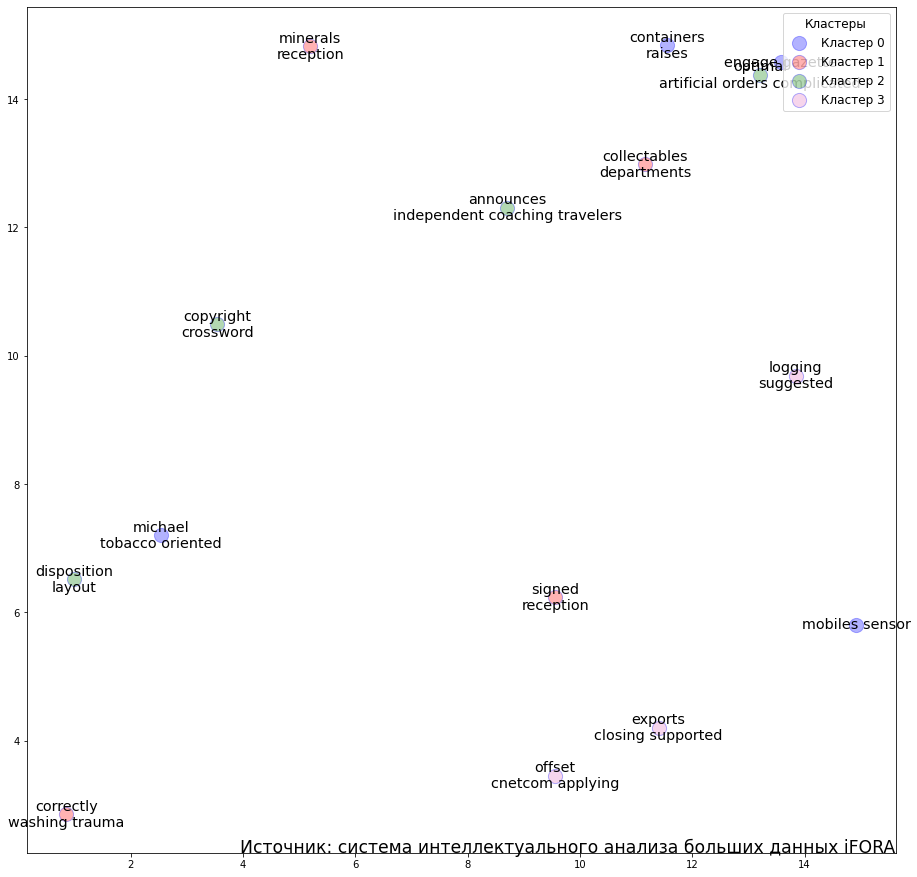

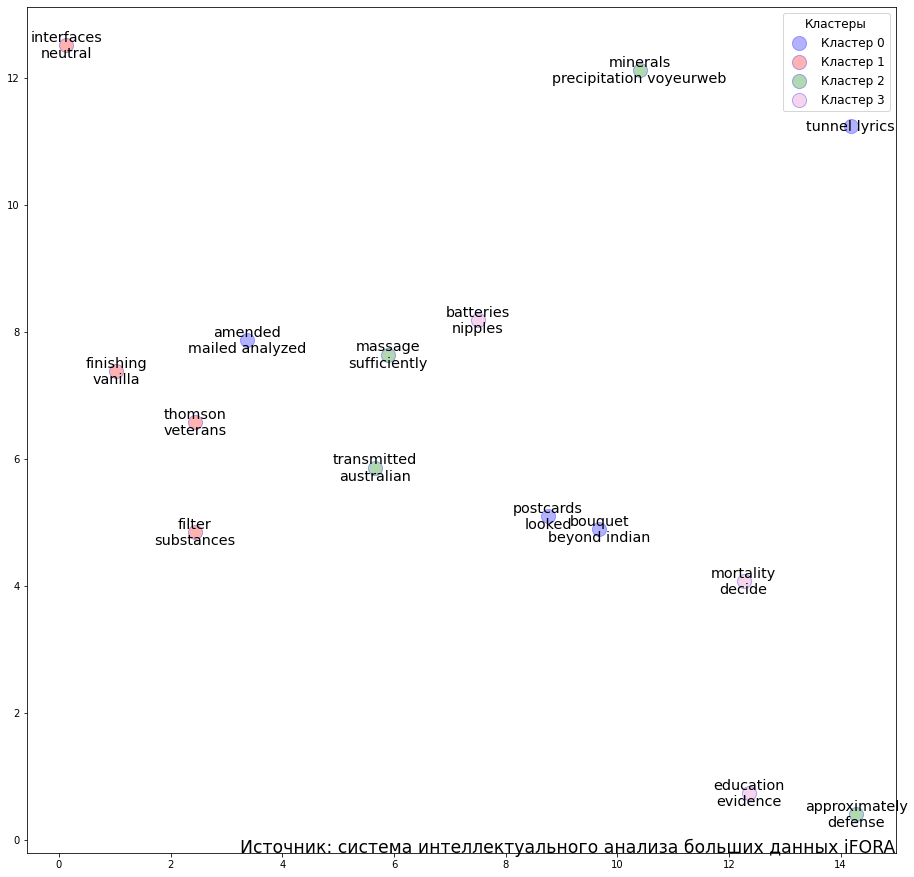

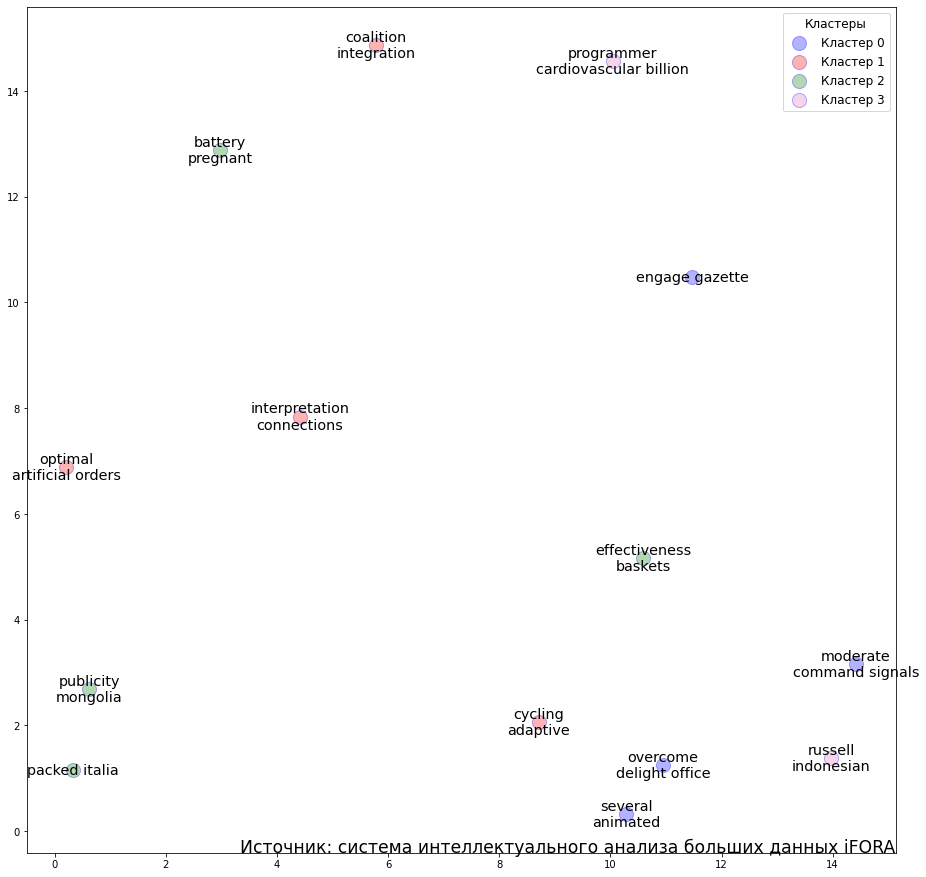

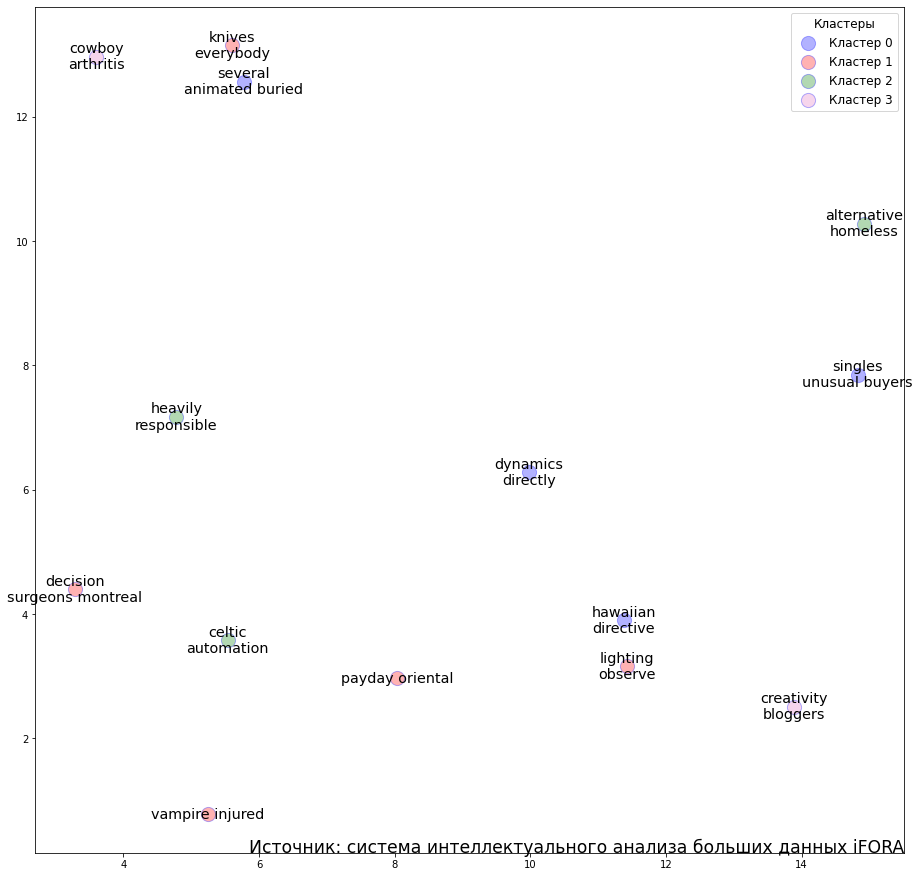

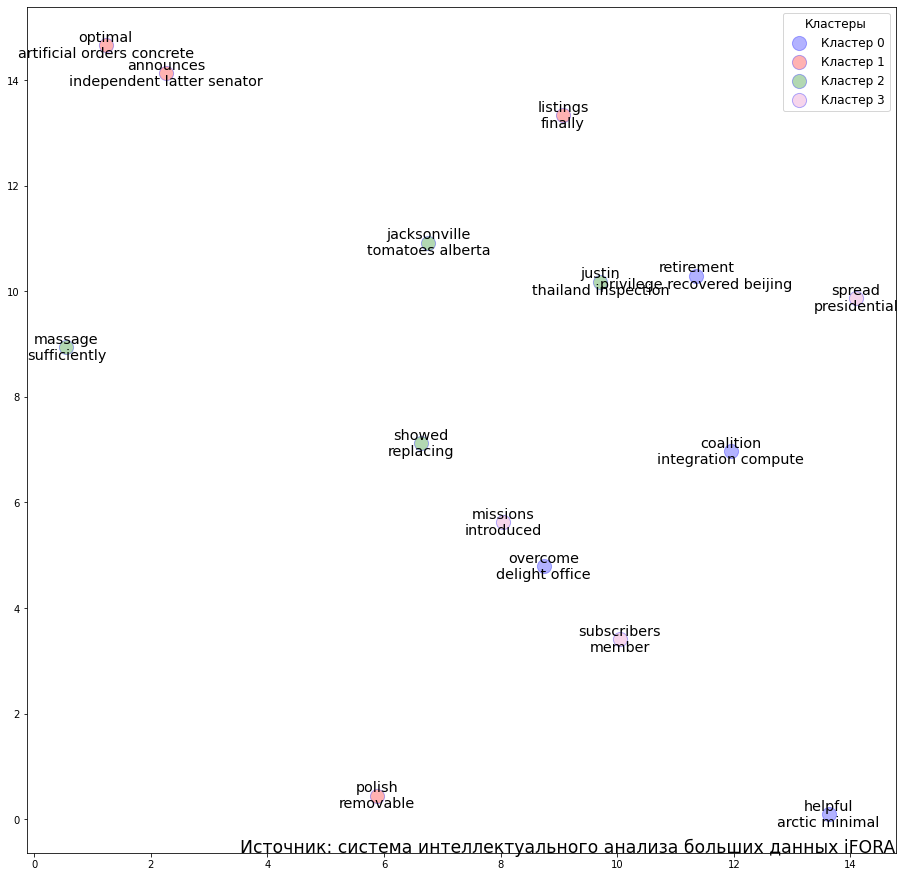

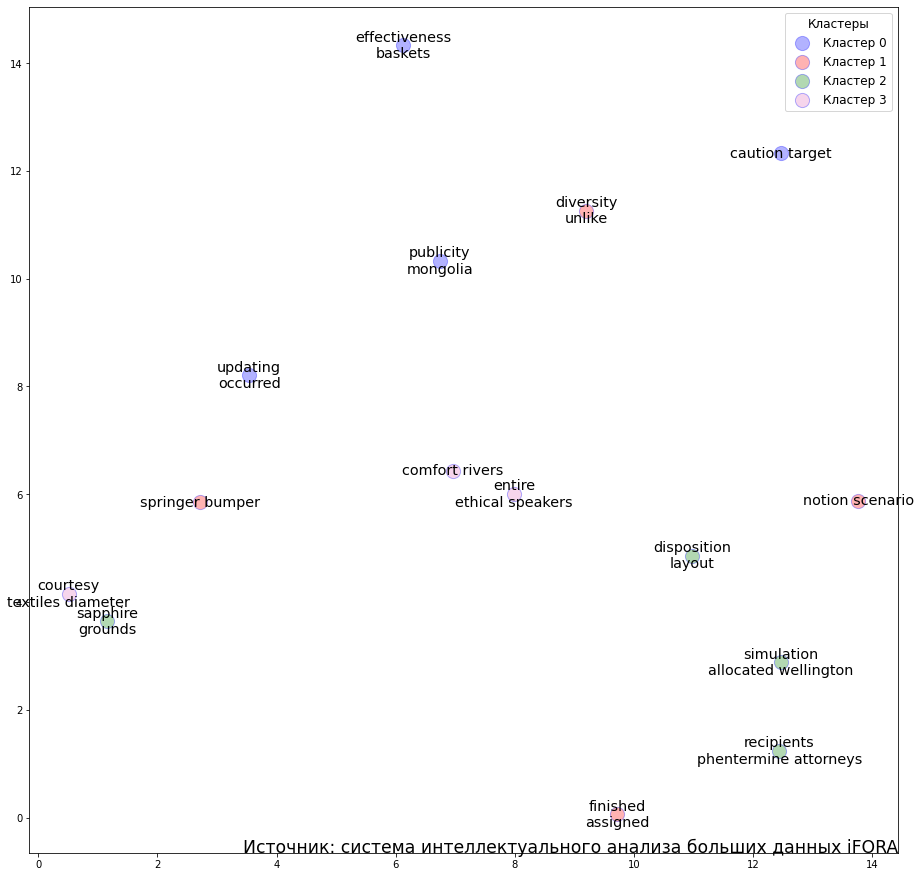

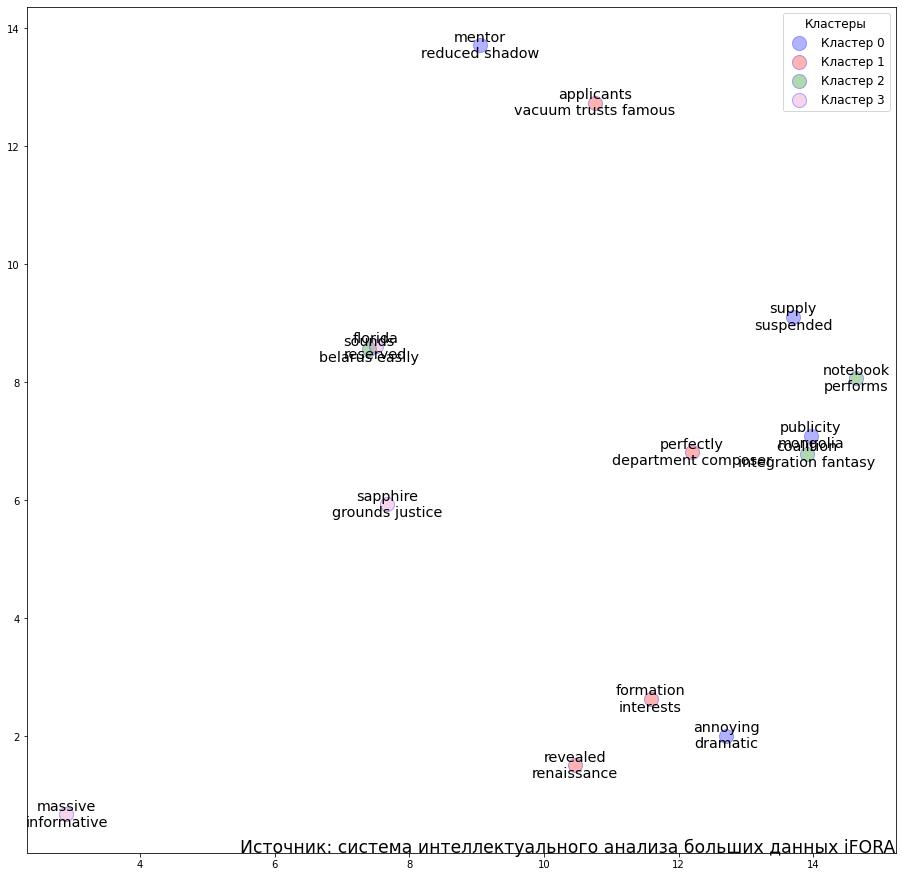

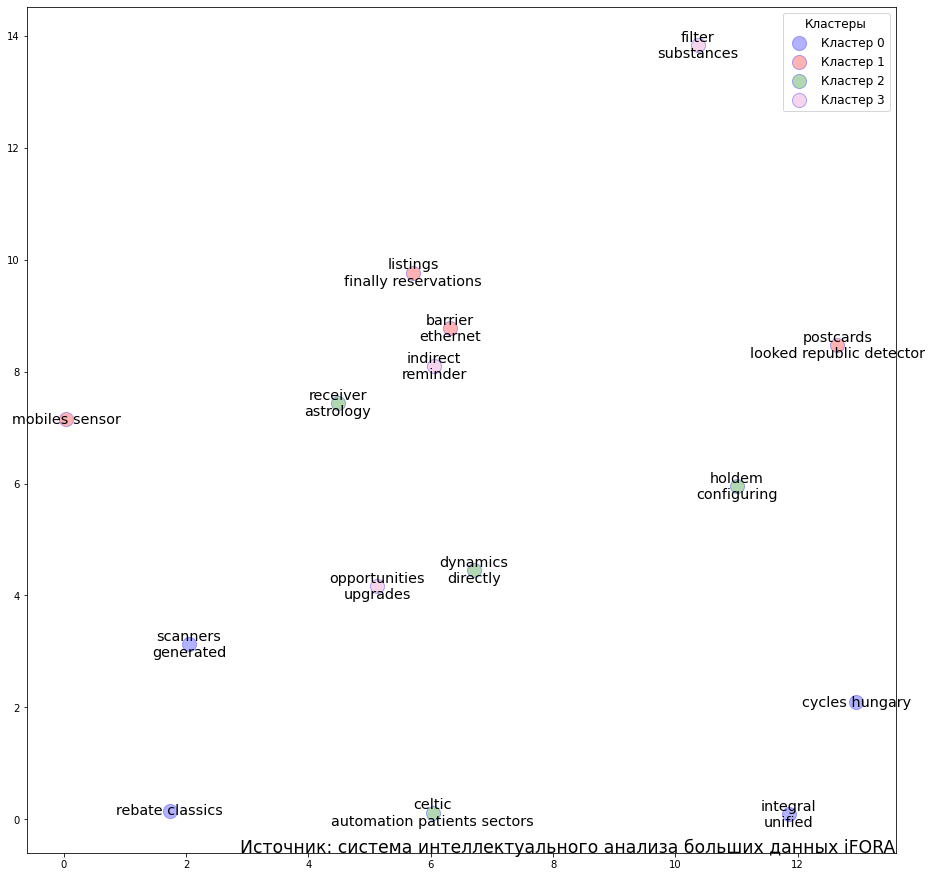

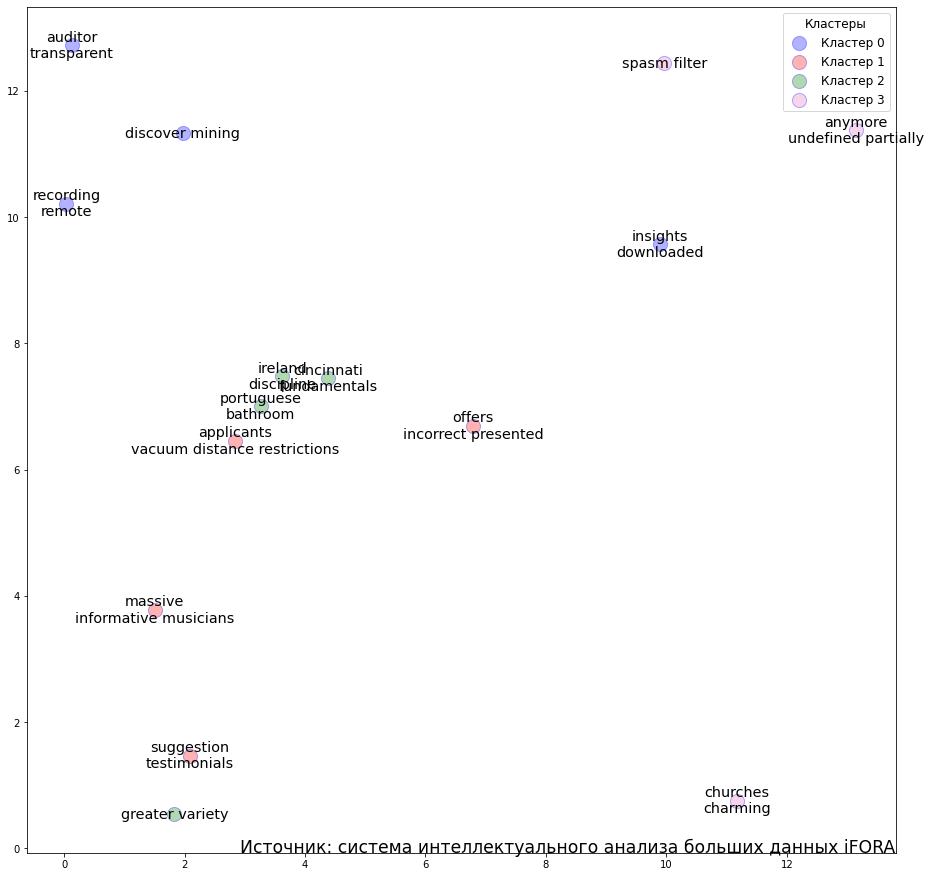

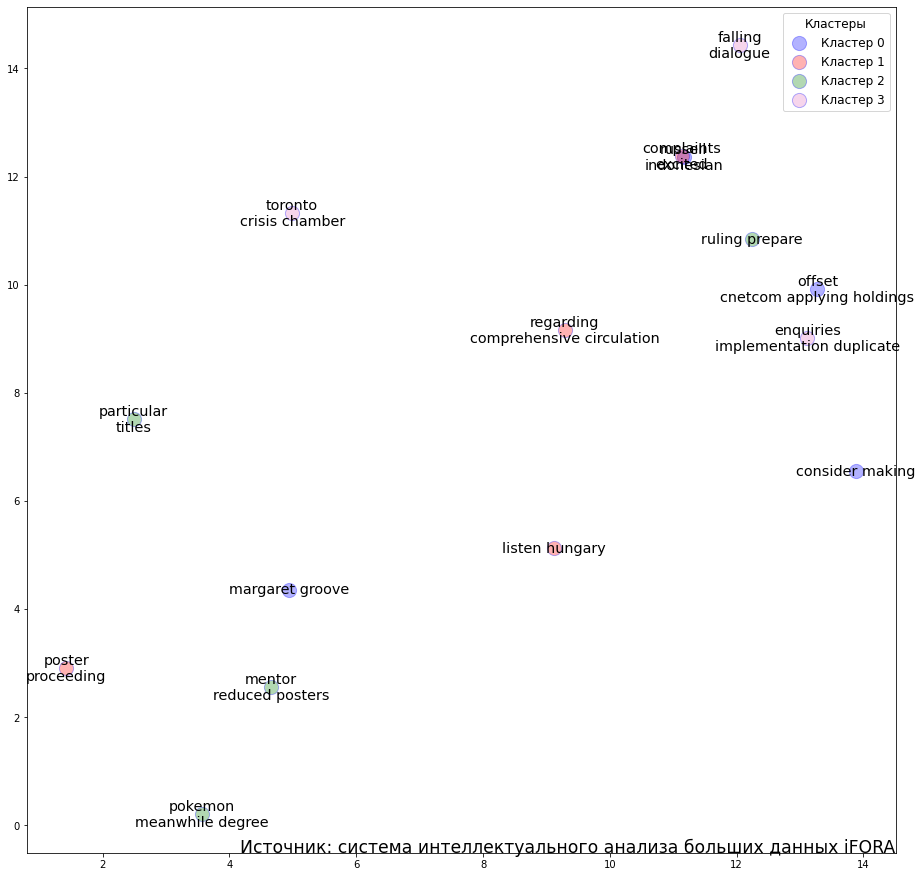

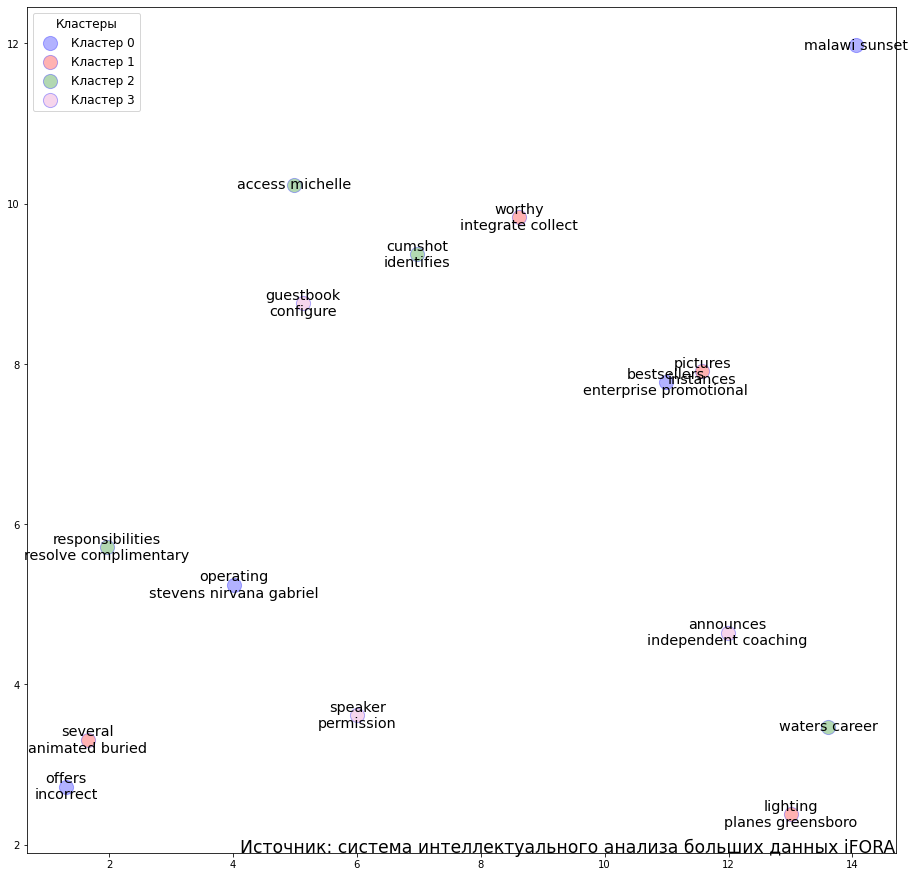

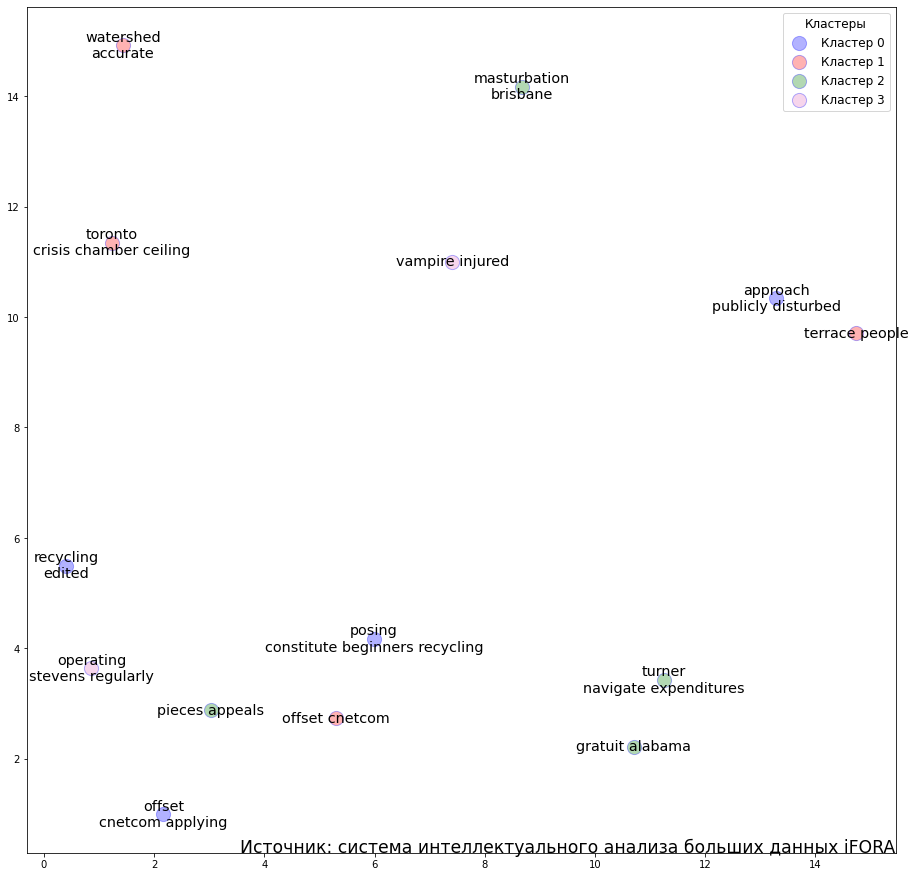

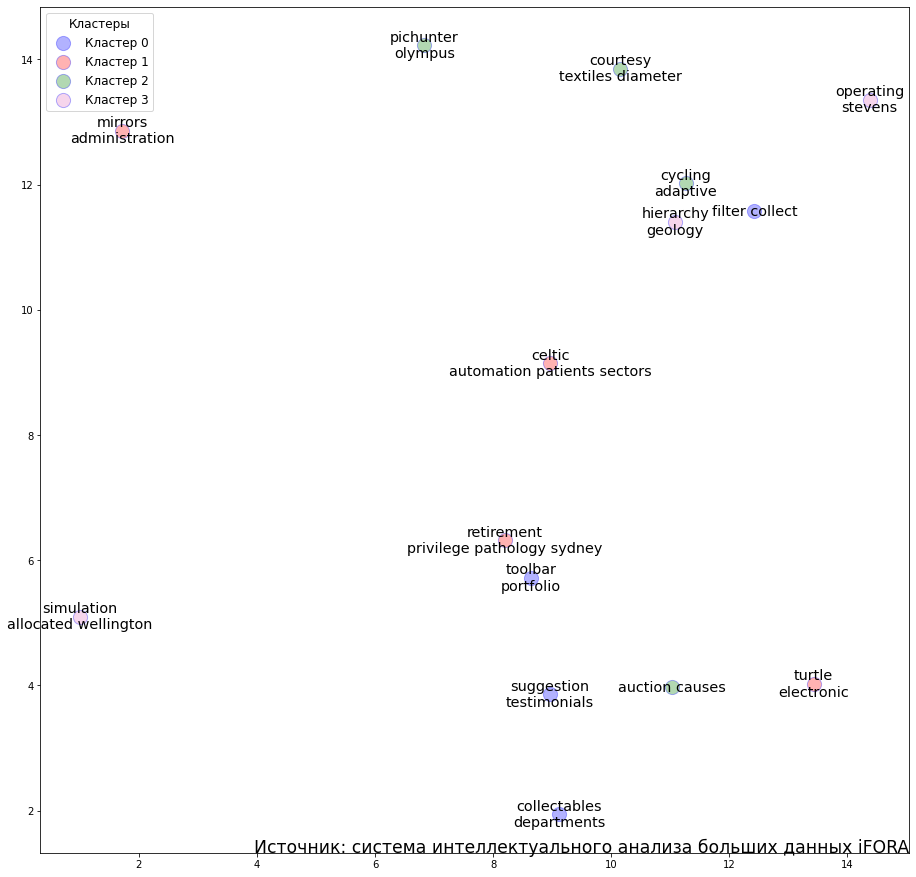

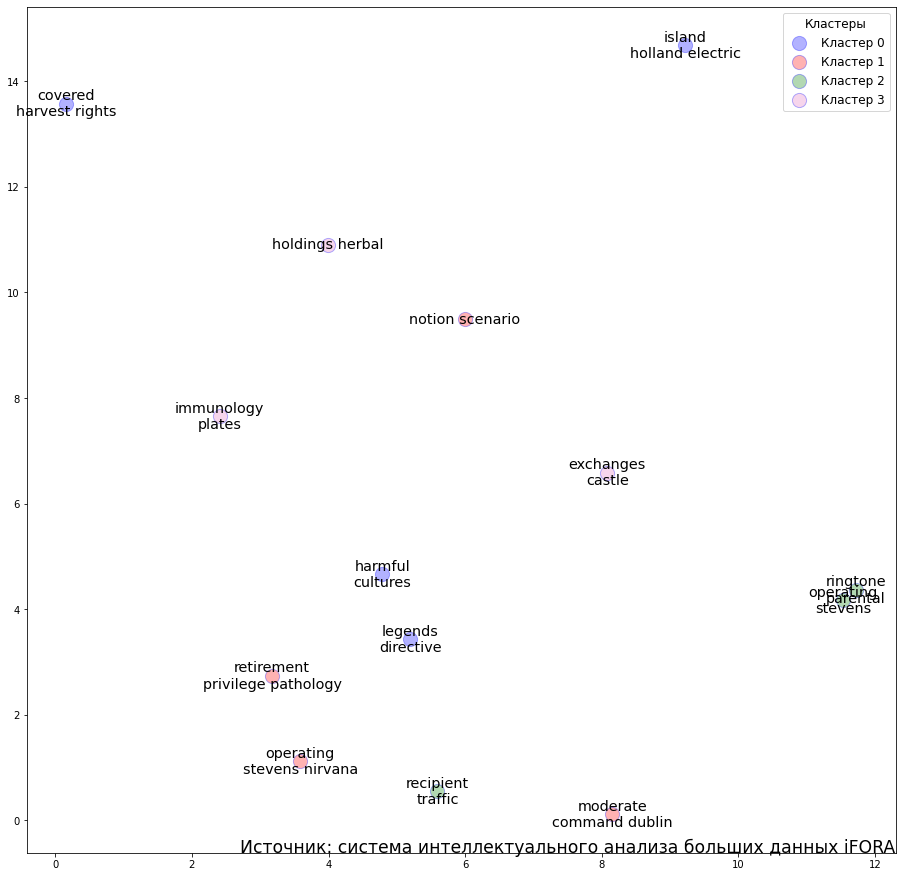

In [ ]:
area_scatters()